In [1]:
import matplotlib.pyplot as plt

from fitness_observer import FitnessObserver
from labs_simulation import run_genetic_algorithm

In [2]:
iterations_number = 100
iterations = [i for i in range(iterations_number)]

## Base algorithm

In [3]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm

In [4]:
base_fitness_observer = FitnessObserver()
run_genetic_algorithm(GeneticAlgorithm, 1.0, observers=[base_fitness_observer])

[2024-05-28 23:01:28,554] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-28 23:01:28,593] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-28 23:01:28,743] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-28 23:01:28,746] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-28 23:01:30,274] [jmetal] [INFO] Evaluations: 1000. fitness: [2910]
[2024-05-28 23:01:31,472] [jmetal] [INFO] Evaluations: 2000. fitness: [2910]
[2024-05-28 23:01:32,677] [jmetal] [INFO] Evaluations: 3000. fitness: [2910]
[2024-05-28 23:01:34,124] [jmetal] [INFO] Evaluations: 4000. fitness: [2910]
[2024-05-28 23:01:35,540] [jmetal] [INFO] Evaluations: 5000. fitness: [2910]
[2024-05-28 23:01:37,196] [jmetal] [INFO] Evaluations: 6000. fitness: [2910]
[2024-05-28 23:01:38,471] [jmetal] [INFO] Evaluations: 7000. fitness: [2910]
[2024-05-28 23:01:39,809] [jmetal] [INFO] Evaluations: 8000. fitness: [2910]
[2024-05-28 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, True, False, True, True, False, False, False, True, False, False, False, True, False, True, False, False, True, True, False, True, False, True, True, False, True, True, False, False, True, True, False, True, True, False, True, True, True, True, False, False, True, True, False, False, False, False, True, False, True, False, False, True, False, True, True, True, False, True, False, True, False, True, False, False, False, False, False, True, True, True, False, False, True, False, False, True, False, True]
Fitness: 2910
Computing time: 14.344284534454346


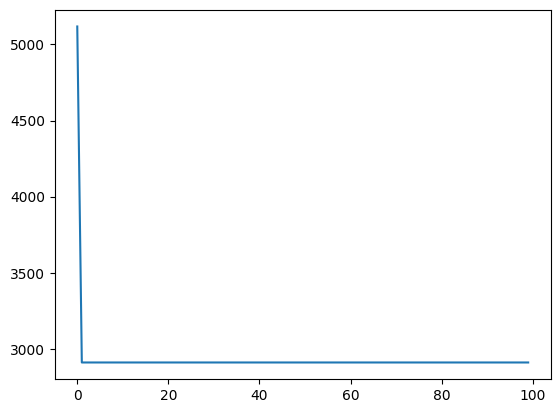

In [5]:
base_fitness = base_fitness_observer.fitness
plt.plot(iterations, base_fitness)
plt.show()

## Follow Best

In [6]:
from follow_best_mutation import FollowBestGA

In [7]:
follow_best_fitness_observer = FitnessObserver()
run_genetic_algorithm(FollowBestGA, 0.5, observers=[follow_best_fitness_observer])

[2024-05-28 23:01:50,350] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-28 23:01:50,367] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-28 23:01:50,477] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-28 23:01:50,481] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-28 23:01:51,918] [jmetal] [INFO] Evaluations: 1000. fitness: [2782]
[2024-05-28 23:01:53,149] [jmetal] [INFO] Evaluations: 2000. fitness: [2622]
[2024-05-28 23:01:54,393] [jmetal] [INFO] Evaluations: 3000. fitness: [2514]
[2024-05-28 23:01:55,643] [jmetal] [INFO] Evaluations: 4000. fitness: [2514]
[2024-05-28 23:01:57,569] [jmetal] [INFO] Evaluations: 5000. fitness: [2514]
[2024-05-28 23:01:58,655] [jmetal] [INFO] Evaluations: 6000. fitness: [2514]
[2024-05-28 23:02:00,613] [jmetal] [INFO] Evaluations: 7000. fitness: [2514]
[2024-05-28 23:02:02,029] [jmetal] [INFO] Evaluations: 8000. fitness: [2514]
[2024-05-28 23

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, False, False, False, False, True, True, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, False, True, False, False, True, True, True, True, False, True, False, False, True, False, False, True, False, True, True, False, True, False, True, True, True, False, True, False, False, True, False, False, False, True, False, True, False, True, True, False, False, False, True, False, False, True, False, False, True, True, True, True, True, True, False, True, False, True, True, False, False, True, True, True, False, True, True, True]
Fitness: 2478
Computing time: 14.9876070022583


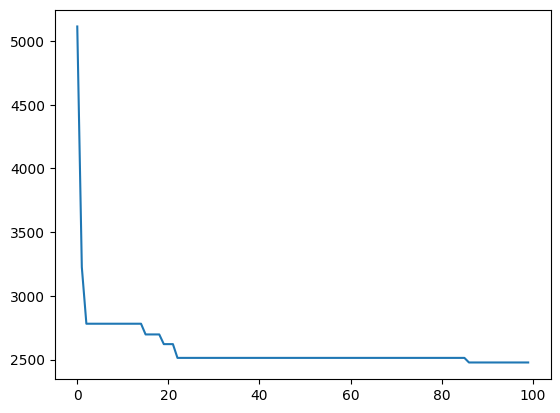

In [8]:
follow_best_fitness = follow_best_fitness_observer.fitness
plt.plot(iterations, follow_best_fitness)
plt.show()

## Follow Best Distinct

In [9]:
from follow_best_distinct import FollowBestDistinctGA

In [10]:
follow_best_distinct_fitness_observer = FitnessObserver()
run_genetic_algorithm(FollowBestDistinctGA, 0.5, observers=[follow_best_distinct_fitness_observer])

[2024-05-28 23:02:09,319] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-28 23:02:09,355] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-28 23:02:09,496] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-28 23:02:09,512] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-28 23:02:20,658] [jmetal] [INFO] Evaluations: 1000. fitness: [2702]
[2024-05-28 23:02:31,726] [jmetal] [INFO] Evaluations: 2000. fitness: [2514]
[2024-05-28 23:02:43,216] [jmetal] [INFO] Evaluations: 3000. fitness: [2350]
[2024-05-28 23:02:54,861] [jmetal] [INFO] Evaluations: 4000. fitness: [2350]
[2024-05-28 23:03:06,493] [jmetal] [INFO] Evaluations: 5000. fitness: [2350]
[2024-05-28 23:03:22,218] [jmetal] [INFO] Evaluations: 6000. fitness: [2350]
[2024-05-28 23:03:41,966] [jmetal] [INFO] Evaluations: 7000. fitness: [2350]
[2024-05-28 23:04:03,184] [jmetal] [INFO] Evaluations: 8000. fitness: [2350]
[2024-05-28 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, False, True, True, False, True, False, False, True, True, True, True, False, False, True, True, False, False, False, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, True, False, False, True, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, True, True, False, True, True, False, False, True, False, True, True, True, True, True, True]
Fitness: 2350
Computing time: 139.85315656661987


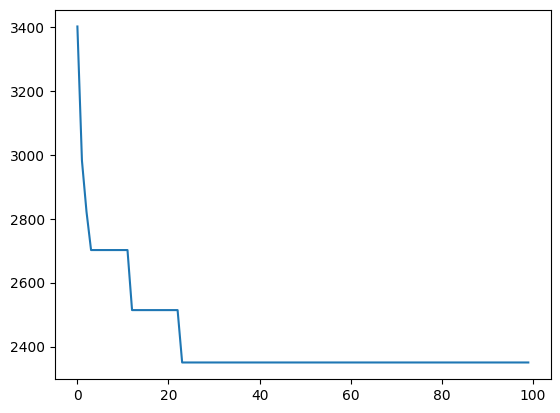

In [11]:
follow_best_distinct_fitness = follow_best_distinct_fitness_observer.fitness
plt.plot(iterations, follow_best_distinct_fitness)
plt.show()

## Repel Worst Gravity

In [12]:
from repel_worst_gravity import RepelWorstGravity

In [13]:
repel_worst_fitness_observer = FitnessObserver()
run_genetic_algorithm(RepelWorstGravity, 0.5, observers=[repel_worst_fitness_observer])

[2024-05-28 23:04:29,520] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-28 23:04:29,539] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-28 23:04:29,636] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-28 23:04:29,651] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-28 23:04:31,132] [jmetal] [INFO] Evaluations: 1000. fitness: [2878]
[2024-05-28 23:04:32,552] [jmetal] [INFO] Evaluations: 2000. fitness: [2802]
[2024-05-28 23:04:33,934] [jmetal] [INFO] Evaluations: 3000. fitness: [2802]
[2024-05-28 23:04:35,441] [jmetal] [INFO] Evaluations: 4000. fitness: [2662]
[2024-05-28 23:04:37,031] [jmetal] [INFO] Evaluations: 5000. fitness: [2662]
[2024-05-28 23:04:38,778] [jmetal] [INFO] Evaluations: 6000. fitness: [2662]
[2024-05-28 23:04:40,259] [jmetal] [INFO] Evaluations: 7000. fitness: [2434]
[2024-05-28 23:04:41,808] [jmetal] [INFO] Evaluations: 8000. fitness: [2434]
[2024-05-28 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, False, True, True, False, True, False, True, True, True, True, True, False, False, False, True, True, False, True, True, False, True, True, True, True, False, True, True, True, False, False, False, False, True, False, True, True, False, False, True, False, False, False, True, True, True, False, False, True, False, True, True, False, True, True, True, True, False, True, False, False, True, False, True, False, True, False, False, True, False, True, False, True, True, True, False, True, True, True, True, False, False, True, True, True, False, True, False, False, False, False, False, True, False, False, False, True, False]
Fitness: 2434
Computing time: 15.286797761917114


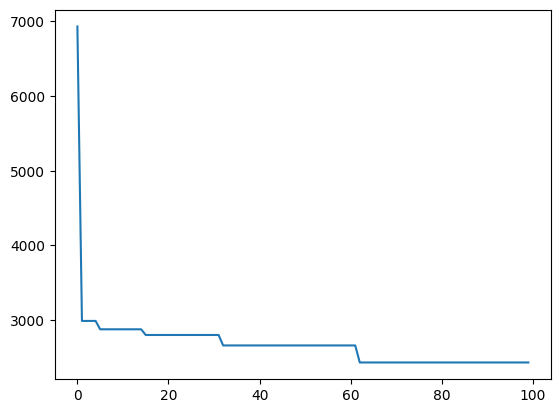

In [14]:
repel_worst_fitness = repel_worst_fitness_observer.fitness
plt.plot(iterations, repel_worst_fitness)
plt.show()

## Repel Worst Gravity Multistep

In [15]:
from repel_worst_gravity_multistep import RepelWorstGravityMultistep

In [16]:
repel_worst_multistep_fitness_observer = FitnessObserver()
run_genetic_algorithm(RepelWorstGravityMultistep, 0.5, observers=[repel_worst_multistep_fitness_observer])

[2024-05-28 23:04:45,040] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-28 23:04:45,066] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-28 23:04:45,168] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-28 23:04:45,169] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-28 23:04:46,575] [jmetal] [INFO] Evaluations: 1000. fitness: [2602]
[2024-05-28 23:04:48,086] [jmetal] [INFO] Evaluations: 2000. fitness: [2446]
[2024-05-28 23:04:49,844] [jmetal] [INFO] Evaluations: 3000. fitness: [2070]
[2024-05-28 23:04:51,148] [jmetal] [INFO] Evaluations: 4000. fitness: [2070]
[2024-05-28 23:04:52,622] [jmetal] [INFO] Evaluations: 5000. fitness: [2070]
[2024-05-28 23:04:54,162] [jmetal] [INFO] Evaluations: 6000. fitness: [2070]
[2024-05-28 23:04:55,715] [jmetal] [INFO] Evaluations: 7000. fitness: [2070]
[2024-05-28 23:04:57,181] [jmetal] [INFO] Evaluations: 8000. fitness: [2070]
[2024-05-28 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, True, False, False, False, True, False, True, True, False, True, False, True, True, True, True, False, False, False, True, False, True, True, True, False, False, False, True, False, True, True, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, False, True, False, False, True, True, True, True, False, False, True, False, True, False, False, True, False, True, True, True, False, True, False, False, False, True, False, False, False, True, True, True, False, True, True, False, True, True, False, False, True, True, False, True, True, True, True, False, True, False, True, True]
Fitness: 2070
Computing time: 14.842005968093872


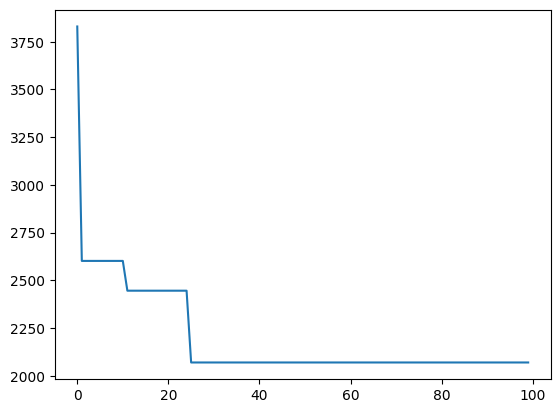

In [17]:
repel_worst_multistep_fitness = repel_worst_multistep_fitness_observer.fitness
plt.plot(iterations, repel_worst_multistep_fitness)
plt.show()

## Comparison

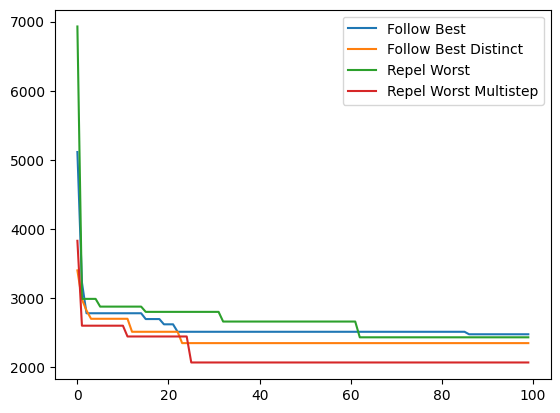

In [18]:
plt.plot(iterations, follow_best_fitness, label="Follow Best")
plt.plot(iterations, follow_best_distinct_fitness, label="Follow Best Distinct")
plt.plot(iterations, repel_worst_fitness, label="Repel Worst")
plt.plot(iterations, repel_worst_multistep_fitness, label="Repel Worst Multistep")
plt.legend()
plt.show()